In [6]:
!pip install mplfinance

     |████████████████████████████████| 71 kB 1.8 MB/s eta 0:00:011


In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [19]:
df = pd.read_csv('./dataset/coins/coin_Bitcoin.csv', parse_dates=['Date'])

df.drop(["Name"],axis=1, inplace=True)
df.drop(["SNo"],axis=1, inplace=True)
df.drop(["Symbol"],axis=1, inplace=True)

df.sample(5)

,Date,High,Low,Open,Close,Volume,Marketcap
2404,2019-11-28 23:59:59,7730.072666,7454.121794,7536.820104,7463.106128,1.905012e+10,1.348794e+11
2972,2021-06-18 23:59:59,38187.260160,35255.854918,38099.477055,35787.244782,3.620089e+10,6.705894e+11
2180,2019-04-18 23:59:59,5319.986114,5250.506659,5251.480692,5298.385699,1.325649e+10,9.353240e+10
1899,2018-07-11 23:59:59,6444.959961,6330.470215,6330.770020,6394.709961,3.644860e+09,1.096319e+11
113,2013-08-20 23:59:59,123.011002,117.508003,119.000000,121.205002,0.000000e+00,1.403830e+09


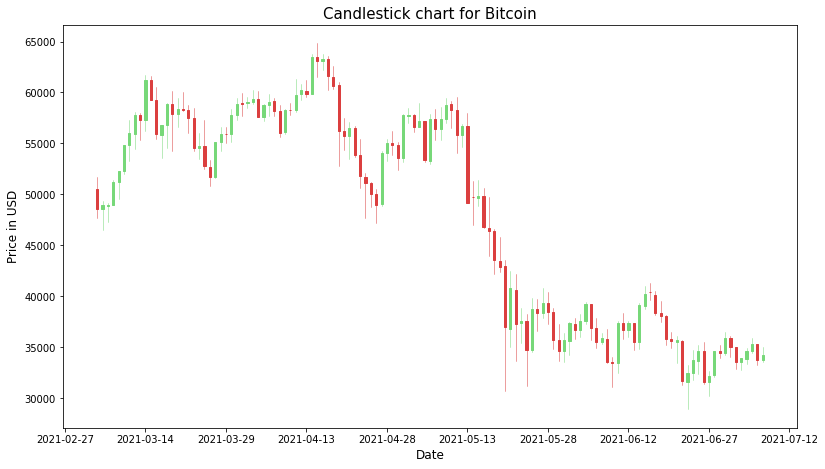

In [22]:
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Date']>'2021-03-04']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()